base_python env

In [110]:
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf') 

import pandas as pd
import numpy as np
import glob
import re

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import mannwhitneyu, ks_2samp, ks_1samp, norm
from statannot import add_stat_annotation
import os
from modules.data_loader import file_extraction, csv_to_xlsx, file_folder_creator
from modules.graphics_handler import histplot_fine_view, boxplot_fine_view


First of all, we need to choose export column in the input tables.
Here, we need Volume(unit) and SurfaceArea (um2). 

## Step 1. Grab .csv files, convert it to .xlsx and upload into dataframe (df).

In [111]:
search_path = 'data2/*cell*'
tot_vol_path = 'data2/total_vol_cx43_s100b.xlsx'
save_folder = 'Cx43_s100b/'

In [112]:
csv_to_xlsx(search_path)

In [113]:
data = file_extraction(search_path)

In [114]:
data.head()

,volume,surface_area,animal_num,exp_group,slice_num,cell_num,protein
id,,,,,,,
1,0.068,1.193,1,ctrl,1,1,Cx43
2,0.058,1.066,1,ctrl,1,1,Cx43
3,0.010,0.314,1,ctrl,1,1,Cx43
4,0.026,0.730,1,ctrl,1,1,Cx43
5,0.029,0.690,1,ctrl,1,1,Cx43


We can see descriptive statistics for our data.

In [115]:
data.describe()

,volume,surface_area
count,268870.000000,268870.000000
mean,0.955050,5.121274
std,69.567665,256.993887
min,0.003000,0.146000
25%,0.026000,0.752000
50%,0.071000,1.480000
75%,0.162000,2.534000
max,8231.582000,29713.446000


## Step 2. Distribution histograms

In [116]:
CLUST_PROTEIN, CELL_PROTEIN = data['protein'].unique()

In [117]:
data_clust= data[(data['protein']==CLUST_PROTEIN)].copy(deep=True)
data_cell = data[(data['protein']==CELL_PROTEIN)].copy(deep=True)

In [118]:
data_clust.drop(data_clust[data_clust['volume']>0.4].index, inplace=True)
data_clust.drop(data_clust[data_clust['surface_area']>6].index, inplace=True)

In [119]:
file_folder_creator('figs')

'Folder created'

In [120]:
file_folder_creator(f'figs/{save_folder}')

'Folder created'

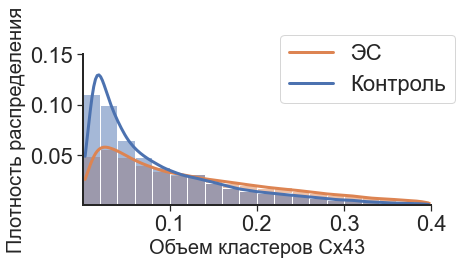

In [121]:
histplot_fine_view(data=data_clust, x='volume',
                    binwidth=0.02, binrange=[0,0.5], 
                    ytick=0.05, xtick=0.1,
                    ylim=[0.0001, 0.15], xlim=[0.0001, 0.4],
                    ylabel='Плотность распределения', xlabel=f'Объем кластеров {CLUST_PROTEIN}',
                    figname = f'{save_folder}/плотность распределения кластеров {CLUST_PROTEIN} с разным объемом')

In [122]:
ks_1samp(data_clust[data_clust['exp_group']=='ctrl'].loc[:,'volume'], norm.cdf)

KstestResult(statistic=0.5011968250459664, pvalue=0.0)

In [123]:
ks_1samp(data_clust[data_clust['exp_group']=='SE'].loc[:,'volume'], norm.cdf)

KstestResult(statistic=0.502393639320564, pvalue=0.0)

In [124]:
ks_2samp(data_clust[data_clust['exp_group']=='ctrl'].loc[:,'volume'], 
         data_clust[data_clust['exp_group']=='SE'].loc[:,'volume'])

KstestResult(statistic=0.18172310173643513, pvalue=0.0)

Here we observe the difference between Cx43 volume clusters distributions and the normal one. The difference between the control and the experiment are exists.

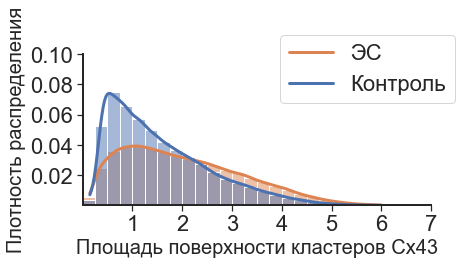

In [125]:
histplot_fine_view(data=data_clust, x='surface_area',
                    binwidth=0.25, binrange=[0,7], 
                    ytick=0.02, xtick=1,
                    ylim=[0.0001, 0.1], xlim=[0.0001, 7],
                    ylabel='Плотность распределения', xlabel=f'Площадь поверхности кластеров {CLUST_PROTEIN}',
                    figname = f'{save_folder}/площадь поверхности клатеров {CLUST_PROTEIN} с разным объемом')


In [126]:
ks_1samp(data_clust[data_clust['exp_group']=='ctrl'].loc[:,'surface_area'], norm.cdf)

KstestResult(statistic=0.616087094613508, pvalue=0.0)

In [127]:
ks_1samp(data_clust[data_clust['exp_group']=='SE'].loc[:,'surface_area'], norm.cdf)

KstestResult(statistic=0.6322989298838961, pvalue=0.0)

In [128]:
ks_2samp(data_clust[data_clust['exp_group']=='ctrl'].loc[:,'surface_area'], 
                  data_clust[data_clust['exp_group']=='SE'].loc[:,'surface_area'])

KstestResult(statistic=0.16944869388043587, pvalue=0.0)

Cx43 clusters surface area of control and experimental group has a distribution that differ from normal. Moreover, they are also distinct between each other.   

We need to calculate surface-to-volume ration to obtain information about clusters shape

In [129]:
data_clust['svr_clust'] = data_clust.loc[:, 'surface_area']/data_clust.loc[:, 'volume']
data_clust.head()

,volume,surface_area,animal_num,exp_group,slice_num,cell_num,protein,svr_clust
id,,,,,,,,
1,0.068,1.193,1,ctrl,1,1,Cx43,17.544118
2,0.058,1.066,1,ctrl,1,1,Cx43,18.379310
3,0.010,0.314,1,ctrl,1,1,Cx43,31.400000
4,0.026,0.730,1,ctrl,1,1,Cx43,28.076923
5,0.029,0.690,1,ctrl,1,1,Cx43,23.793103


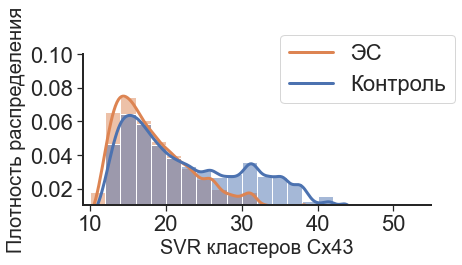

In [130]:
histplot_fine_view(data=data_clust, x='svr_clust',
                    binwidth=2, binrange=[0,50], 
                    ytick=0.02, xtick=10,
                    ylim=[0.01, 0.1], xlim=[9, 55],
                    ylabel='Плотность распределения', xlabel=f'SVR кластеров {CLUST_PROTEIN}',
                    figname = f'{save_folder}/SVR кластеров {CLUST_PROTEIN} с разным объемом')


In [131]:
ks_1samp(data_clust[data_clust['exp_group']=='ctrl'].loc[:,'svr_clust'], norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [132]:
ks_1samp(data_clust[data_clust['exp_group']=='SE'].loc[:,'svr_clust'], norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [133]:
stat_ks_test, p_ks_test = ks_2samp(data_clust[data_clust['exp_group']=='ctrl'].iloc[:,-1], data_clust[data_clust['exp_group']=='SE'].iloc[:,-1])

print('Statistics=%.3f, p=%.50f' % (stat_ks_test, p_ks_test))

Statistics=0.193, p=0.00000000000000000000000000000000000000000000000000


The curves from the two experimental groups belong to different distributions, which is confirmed by the Kolmagorov-Smirnov test. Moreover, we see here two-phased distribution of Cx43 clusters SVR in ctrl that dissapear after SE.

## Step 3. Hypothesis testing

In [134]:
mask_ctrl_clust = data['exp_group']=='ctrl'
mask_SE_clust= data['exp_group']=='SE'

<AxesSubplot:>

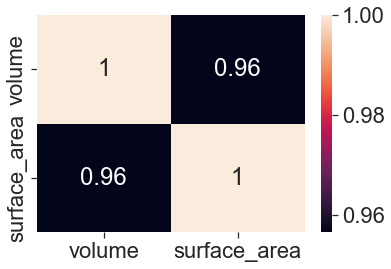

In [135]:
sns.heatmap(data[mask_ctrl_clust].iloc[:, :2].corr(), annot=True)

<AxesSubplot:>

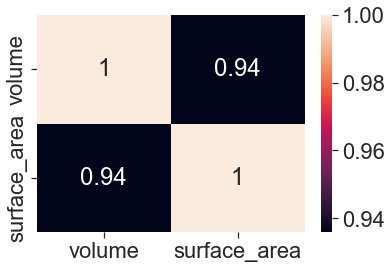

In [136]:
sns.heatmap(data[mask_SE_clust].iloc[:, :2].corr(), annot=True)

We see a positive correlation between the cluster volume and its surface area for both group. This means that the larger the volume, the larger the surface area.

### SVR ctrl vs. SE

We want to see the distribution of features in individual cells. For this we use pivot_table

In [137]:
wide_clust = pd.pivot_table(data_clust,
                index = ['animal_num','slice_num','cell_num'],
                columns = ['exp_group'],
                values = ['volume', 'surface_area', 'svr_clust'],
                aggfunc = 'median')  
wide_clust = wide_clust.reindex(columns=[('volume','ctrl'),('volume','SE'), 
                            ('surface_area', 'ctrl'), ('surface_area', 'SE'), 
                            ('svr_clust','ctrl'), ('svr_clust','SE')])
wide_clust.head()


volume        surface_area          svr_clust  \
exp_group                       ctrl     SE         ctrl      SE       ctrl   
animal_num slice_num cell_num                                                 
1          1         1         0.065  0.065        1.317  1.3675  20.709831   
                     2         0.090    NaN        1.775     NaN  19.237569   
           2         1           NaN  0.045          NaN  1.0420        NaN   
                     2           NaN  0.048          NaN  1.1060        NaN   
2          1         1         0.162  0.048        2.402  1.0630  15.080822   

                                          
exp_group                             SE  
animal_num slice_num cell_num             
1          1         1         20.862692  
                     2               NaN  
           2         1         23.414286  
                     2         22.611111  
2          1         1         22.357143

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('svr_clust', 'ctrl') v.s. ('svr_clust', 'SE'): Mann-Whitney-Wilcoxon test two-sided, P_val=1.138e-01 U_stat=3.220e+02


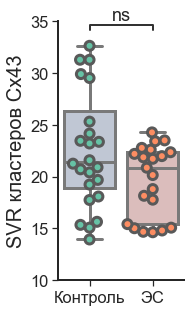

In [138]:
boxplot_fine_view(data=wide_clust.iloc[:, 4:6], 
                    box_pairs=(('svr_clust','ctrl'),('svr_clust','SE')),
                    ylabel=f'SVR кластеров {CLUST_PROTEIN}',
                    ylim=[10, 35], ytick = 5,
                    figname = f'{save_folder}/SVR кластеров {CLUST_PROTEIN}')

In [139]:
percentile_svr_clusters = wide_clust.iloc[:, 4:6].quantile([0.25, 0.50 , 0.75])
print(percentile_svr_clusters)

           svr_clust           
exp_group       ctrl         SE
0.25       18.949010  15.420561
0.50       21.420376  20.862692
0.75       26.361577  22.357143


In [140]:
stat_svr_num, p_svr_num = mannwhitneyu(wide_clust.iloc[:, 4].dropna(), wide_clust.iloc[:, 5].dropna())
print('Statistics=%.3f, p=%.8f' % (stat_svr_num, p_svr_num))

Statistics=322.000, p=0.11383694


Cx43 clusters SVR is not statistically different in control and after ES

### Clusters quantity ctrl vs SE

Add a column with data of the clusters quantity for each cell

In [141]:
wide_clust [[('clust_quantity', 'ctrl'), (('clust_quantity', 'SE'))]] = pd.pivot_table(data_clust,
                                                                                    index = ['animal_num','slice_num','cell_num'],
                                                                                    columns = ['exp_group'],
                                                                                    values = ['volume'],
                                                                                    aggfunc = 'count')
wide_clust.head()

volume        surface_area          svr_clust  \
exp_group                       ctrl     SE         ctrl      SE       ctrl   
animal_num slice_num cell_num                                                 
1          1         1         0.065  0.065        1.317  1.3675  20.709831   
                     2         0.090    NaN        1.775     NaN  19.237569   
           2         1           NaN  0.045          NaN  1.0420        NaN   
                     2           NaN  0.048          NaN  1.1060        NaN   
2          1         1         0.162  0.048        2.402  1.0630  15.080822   

                                         clust_quantity          
exp_group                             SE           ctrl      SE  
animal_num slice_num cell_num                                    
1          1         1         20.862692         1474.0  9356.0  
                     2               NaN            NaN  7531.0  
           2         1         23.414286         1102.0     NaN  
                     2         22.611111         1873.0     NaN  
2          1         1         22.357143         2650.0  6144.0

We are interested in information about the density of clusters in the volume. Lets add a column with the number of clusters per 5 µm3. To do this, get the data on the total volume from the file 'data/total_vol.xlsx'

In [142]:
tot_vol_df = pd.read_excel(f'{tot_vol_path}', usecols=[0,1], dtype='float64')
tot_vol_df.mean()

TotVol_Cx43_ctrl    9919.751697
TotVol_Cx43_SE      9900.454446
dtype: float64

In [143]:
wide_clust [('clust_quantity_per_125', 'ctrl')] = (wide_clust[('clust_quantity', 'ctrl')]*125)/tot_vol_df.mean()[0]
wide_clust [('clust_quantity_per_125', 'SE')] = (wide_clust[('clust_quantity', 'SE')]*125)/tot_vol_df.mean()[1]
wide_clust.head()

volume        surface_area          svr_clust  \
exp_group                       ctrl     SE         ctrl      SE       ctrl   
animal_num slice_num cell_num                                                 
1          1         1         0.065  0.065        1.317  1.3675  20.709831   
                     2         0.090    NaN        1.775     NaN  19.237569   
           2         1           NaN  0.045          NaN  1.0420        NaN   
                     2           NaN  0.048          NaN  1.1060        NaN   
2          1         1         0.162  0.048        2.402  1.0630  15.080822   

                                         clust_quantity          \
exp_group                             SE           ctrl      SE   
animal_num slice_num cell_num                                     
1          1         1         20.862692         1474.0  9356.0   
                     2               NaN            NaN  7531.0   
           2         1         23.414286         1102.0     NaN   
                     2         22.611111         1873.0     NaN   
2          1         1         22.357143         2650.0  6144.0   

                              clust_quantity_per_125              
exp_group                                       ctrl          SE  
animal_num slice_num cell_num                                     
1          1         1                     18.574054  118.125891  
                     2                           NaN   95.084019  
           2         1                     13.886436         NaN  
                     2                     23.601901         NaN  
2          1         1                     33.392973   77.572197

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('clust_quantity_per_125', 'ctrl') v.s. ('clust_quantity_per_125', 'SE'): Mann-Whitney-Wilcoxon test two-sided, P_val=4.597e-01 U_stat=2.850e+02


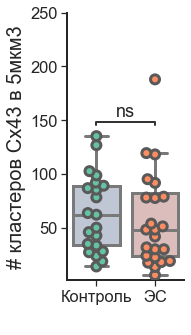

In [144]:
boxplot_fine_view(data=wide_clust.iloc[:, 8:10], 
                    box_pairs=(('clust_quantity_per_125','ctrl'),('clust_quantity_per_125','SE')),
                    ylabel=f'# кластеров {CLUST_PROTEIN} в 5мкм3',
                    ylim=[1, 250], ytick = 50,
                    figname = f'{save_folder}/количество кластеров {CLUST_PROTEIN} с разным объемом boxplot per cell')

Let's compare our samples by the clusters quantity and find that there are no statistical differences.

Then, we calculate median, 25 and 75 percentiles.

In [145]:
percentile_num_clusters = wide_clust.iloc[:, 8:].quantile([0.25, 0.50 , 0.75])
print(percentile_num_clusters)

          clust_quantity_per_125           
exp_group                   ctrl         SE
0.25                   33.392973  23.436424
0.50                   62.047924  48.116478
0.75                   89.001724  82.029063


In [146]:
stat_clust_num, p_clust_num = mannwhitneyu(wide_clust.iloc[:, 8].dropna(), wide_clust.iloc[:, 9].dropna())
print('Statistics=%.3f, p=%.8f' % (stat_clust_num, p_clust_num))

Statistics=285.000, p=0.45966378


Due to the nonparametric Mann-Whitney test, we check whether the clusters quantity after SE differs significantly in comparison to the control. The epilepsy group doesn't demonstrate some differs in comparison to the control group by this parameter.

### Clusters volume fraction(VF)

Then, we should to calculate volume fraction(vf). vf it is a Cx43 volume occupied by tissue. Firstly, we calculate the sum of volume of all clusters. 

In [147]:
wide_clust [[('sum_volume', 'ctrl'), (('sum_volume', 'SE'))]] = pd.pivot_table(data_clust,
                                                                            index = ['animal_num','slice_num','cell_num'],
                                                                            columns = ['exp_group'],
                                                                            values = ['volume'],
                                                                            aggfunc = 'sum')
wide_clust.head()

volume        surface_area          svr_clust  \
exp_group                       ctrl     SE         ctrl      SE       ctrl   
animal_num slice_num cell_num                                                 
1          1         1         0.065  0.065        1.317  1.3675  20.709831   
                     2         0.090    NaN        1.775     NaN  19.237569   
           2         1           NaN  0.045          NaN  1.0420        NaN   
                     2           NaN  0.048          NaN  1.1060        NaN   
2          1         1         0.162  0.048        2.402  1.0630  15.080822   

                                         clust_quantity          \
exp_group                             SE           ctrl      SE   
animal_num slice_num cell_num                                     
1          1         1         20.862692         1474.0  9356.0   
                     2               NaN            NaN  7531.0   
           2         1         23.414286         1102.0     NaN   
                     2         22.611111         1873.0     NaN   
2          1         1         22.357143         2650.0  6144.0   

                              clust_quantity_per_125             sum_volume  \
exp_group                                       ctrl          SE       ctrl   
animal_num slice_num cell_num                                                 
1          1         1                     18.574054  118.125891   143.9276   
                     2                           NaN   95.084019        NaN   
           2         1                     13.886436         NaN    58.9469   
                     2                     23.601901         NaN   114.9464   
2          1         1                     33.392973   77.572197   159.1511   

                                          
exp_group                             SE  
animal_num slice_num cell_num             
1          1         1          793.0497  
                     2          869.7618  
           2         1               NaN  
                     2               NaN  
2          1         1         1026.2796

Then, we divide sum_volume on total volume to obtain VF

In [148]:
wide_clust [('vf', 'ctrl')] = wide_clust[('sum_volume', 'ctrl')]/tot_vol_df.mean()[0]
wide_clust [('vf', 'SE')] = wide_clust[('sum_volume', 'SE')]/tot_vol_df.mean()[1]
wide_clust.head()

volume        surface_area          svr_clust  \
exp_group                       ctrl     SE         ctrl      SE       ctrl   
animal_num slice_num cell_num                                                 
1          1         1         0.065  0.065        1.317  1.3675  20.709831   
                     2         0.090    NaN        1.775     NaN  19.237569   
           2         1           NaN  0.045          NaN  1.0420        NaN   
                     2           NaN  0.048          NaN  1.1060        NaN   
2          1         1         0.162  0.048        2.402  1.0630  15.080822   

                                         clust_quantity          \
exp_group                             SE           ctrl      SE   
animal_num slice_num cell_num                                     
1          1         1         20.862692         1474.0  9356.0   
                     2               NaN            NaN  7531.0   
           2         1         23.414286         1102.0     NaN   
                     2         22.611111         1873.0     NaN   
2          1         1         22.357143         2650.0  6144.0   

                              clust_quantity_per_125             sum_volume  \
exp_group                                       ctrl          SE       ctrl   
animal_num slice_num cell_num                                                 
1          1         1                     18.574054  118.125891   143.9276   
                     2                           NaN   95.084019        NaN   
           2         1                     13.886436         NaN    58.9469   
                     2                     23.601901         NaN   114.9464   
2          1         1                     33.392973   77.572197   159.1511   

                                                vf            
exp_group                             SE      ctrl        SE  
animal_num slice_num cell_num                                 
1          1         1          793.0497  0.014509  0.080102  
                     2          869.7618       NaN  0.087851  
           2         1               NaN  0.005942       NaN  
                     2               NaN  0.011588       NaN  
2          1         1         1026.2796  0.016044  0.103660

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('vf', 'ctrl') v.s. ('vf', 'SE'): Mann-Whitney-Wilcoxon test two-sided, P_val=1.423e-01 U_stat=3.170e+02


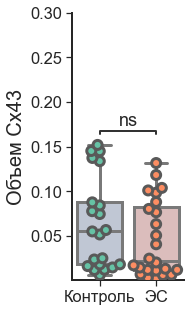

In [149]:
boxplot_fine_view(data=wide_clust.iloc[:, 12:14], 
                    box_pairs=(('vf','ctrl'),('vf','SE')),
                    ylabel=f'Объем {CLUST_PROTEIN}',
                    ylim=[0.0001, 0.3], ytick = 0.05,
                    figname = f'{save_folder}/VF {CLUST_PROTEIN} с разным объемом boxplot per cell')

The samples also has no difference in the VF.

## Step 3. s100b calculation

Since s100b does not aggregates in clusters, we consider using only the volume of the fraction (VF).

### s100b volume fraction ctrl vs SE

In [150]:
wide_cell = pd.pivot_table(data_cell,
                        index = ['animal_num','slice_num','cell_num'],
                        columns = ['exp_group'],
                        values = ['volume'],
                        aggfunc = 'sum')
wide_cell = wide_cell.reindex(columns=[('volume','ctrl'),('volume','SE')])
wide_cell.head()

volume          
exp_group                          ctrl        SE
animal_num slice_num cell_num                    
1          1         1         3999.099  3257.818
                     2         5448.125       NaN
           2         1              NaN  1017.618
                     2              NaN   823.329
2          1         1         7474.594  4988.328

In [151]:
tot_vol_df.mean()

TotVol_Cx43_ctrl    9919.751697
TotVol_Cx43_SE      9900.454446
dtype: float64

In [152]:
wide_cell[('vf','ctrl')] = wide_cell.iloc[:,0]/tot_vol_df.mean()[0]
wide_cell[('vf','SE')] = wide_cell.iloc[:,1]/tot_vol_df.mean()[1]
wide_cell.head()

volume                  vf          
exp_group                          ctrl        SE      ctrl        SE
animal_num slice_num cell_num                                        
1          1         1         3999.099  3257.818  0.403145  0.329057
                     2         5448.125       NaN  0.549220       NaN
           2         1              NaN  1017.618       NaN  0.102785
                     2              NaN   823.329       NaN  0.083161
2          1         1         7474.594  4988.328  0.753506  0.503848

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('vf', 'ctrl') v.s. ('vf', 'SE'): Mann-Whitney-Wilcoxon test two-sided, P_val=9.365e-01 U_stat=2.560e+02


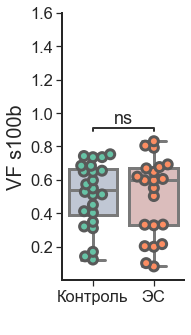

In [153]:
boxplot_fine_view(data=wide_cell.iloc[:,2:4], box_pairs=(('vf', 'ctrl'), ('vf', 'SE')), 
                        ylabel = f'VF {CELL_PROTEIN}', ylim = [0.0001, 1.6],
                        ytick = 0.2, figname= f'{save_folder}/VF {CELL_PROTEIN}')

In [154]:
percentile_vf_cell = wide_cell.iloc[:, 2:4].quantile([0.25, 0.50 , 0.75])
print(percentile_vf_cell)

                 vf          
exp_group      ctrl        SE
0.25       0.389820  0.329057
0.50       0.539015  0.598177
0.75       0.662679  0.669183


In [155]:
stat_vf_cell, p_vf_cell= mannwhitneyu(wide_cell.iloc[:, 2].dropna(), wide_cell.iloc[:, 3].dropna())
print('Statistics=%.3f, p=%.8f' % (stat_vf_cell, p_vf_cell))

Statistics=256.000, p=0.93653332


We see that after SE, s100b volume fraction doesn't change significantly.

## Step 4. Save result 

Save obtain statistical criteria to excel file

In [156]:
stat_table_final = pd.DataFrame(data =[(p_clust_num,stat_clust_num), (p_ks_test, stat_ks_test), 
                                        (p_svr_num, stat_svr_num), (p_vf_cell, stat_vf_cell)], 
                                index=['clust_num',' ks_test','svr_num', 'vf_cell'],
                                columns = ['p-value', 'MW(U)'])
stat_table_final

,p-value,MW(U)
clust_num,0.459664,285.000000
ks_test,0.000000,0.192707
svr_num,0.113837,322.000000
vf_cell,0.936533,256.000000


In [157]:
perc_table_final = pd.concat([pd.DataFrame(data = percentile_num_clusters.values, index=[0.25, 0.50, 0.75], columns = ['ctrl', 'SE']), 
           pd.DataFrame(data = percentile_svr_clusters.values, index=[0.25, 0.50, 0.75], columns = ['ctrl', 'SE']),
           pd.DataFrame(data = percentile_vf_cell.values, index=[0.25, 0.50, 0.75], columns = ['ctrl', 'SE'])], 
           axis = 0, keys=['num_clusters', 'svr_clusters', 'vf_cell'])
perc_table_final

ctrl         SE
num_clusters 0.25  33.392973  23.436424
             0.50  62.047924  48.116478
             0.75  89.001724  82.029063
svr_clusters 0.25  18.949010  15.420561
             0.50  21.420376  20.862692
             0.75  26.361577  22.357143
vf_cell      0.25   0.389820   0.329057
             0.50   0.539015   0.598177
             0.75   0.662679   0.669183

In [158]:
with pd.ExcelWriter(f'output_table/final_out_{CELL_PROTEIN}_{CLUST_PROTEIN}.xlsx') as writer:  
    perc_table_final.to_excel(writer, sheet_name='Percentiles', float_format="%.2f")
    stat_table_final.to_excel(writer, sheet_name='P-val, MW(U)', float_format="%.10f")